# Practical - 16 : Analyze clickstream data to understand user navigation paths across web pages.




In [ ]:
import pandas as pd

df = pd.read_csv('/content/e-shop clothing 2008.csv', delimiter=';')
print(df.columns)
print(df.head())


Index(['year', 'month', 'day', 'order', 'country', 'session ID',
       'page 1 (main category)', 'page 2 (clothing model)', 'colour',
       'location', 'model photography', 'price', 'price 2', 'page'],
      dtype='object')
   year  month  day  order  country  session ID  page 1 (main category)  \
0  2008      4    1      1       29           1                       1   
1  2008      4    1      2       29           1                       1   
2  2008      4    1      3       29           1                       2   
3  2008      4    1      4       29           1                       2   
4  2008      4    1      5       29           1                       2   

  page 2 (clothing model)  colour  location  model photography  price  \
0                     A13       1         5                  1     28   
1                     A16       1         6                  1     33   
2                      B4      10         2                  1     52   
3                     B17      

In [ ]:
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

# Sort data for sequential analysis
df = df.sort_values(by=['session ID', 'order'])

Total sessions: 24026


,count
page 2 (clothing model),
B4,3579
A2,3013
A11,2789
P1,2681
B10,2566
A4,2522
A15,2489
A5,2354
A10,2280


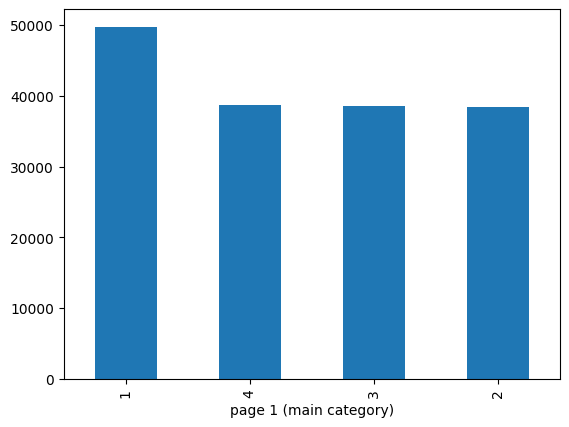

In [ ]:
print(f"Total sessions: {df['session ID'].nunique()}")

df['page 1 (main category)'].value_counts().head(10).plot(kind='bar')

df['page 2 (clothing model)'].value_counts().head(10)

In [ ]:
# Group by session and collect visited pages
paths = df.groupby('session ID')['page 1 (main category)'].apply(list)
paths.head()

,page 1 (main category)
session ID,
1,"[1, 1, 2, 2, 2, 3, 3, 4, 4]"
2,"[2, 2, 2, 2, 1, 1, 2, 4, 4, 4]"
3,"[2, 3, 3, 3, 3, 4]"
4,"[1, 1, 3, 3]"
5,[3]


<Axes: title={'center': 'Most Common Drop-off Pages'}, xlabel='page 1 (main category)'>

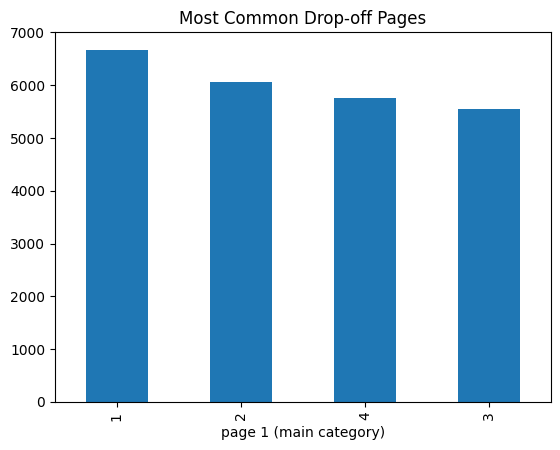

In [ ]:
drop_offs = df.groupby('session ID').tail(1)
drop_off_counts = drop_offs['page 1 (main category)'].value_counts().head(10)
drop_off_counts.plot(kind='bar', title="Most Common Drop-off Pages")


<Axes: title={'center': 'Monthly Visit Trend'}, xlabel='month_year'>

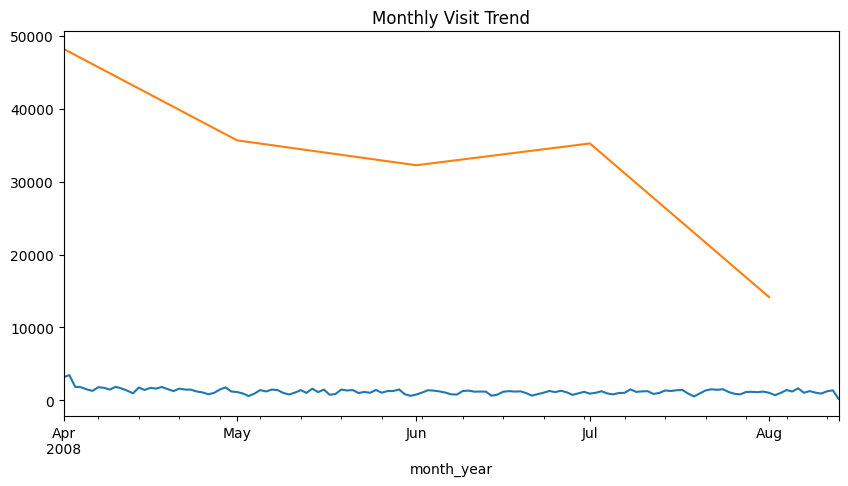

In [ ]:
daily_visits = df.groupby('date').size()
daily_visits.plot(title="Daily Visits", figsize=(10, 5))

df['month_year'] = df['date'].dt.to_period('M')
df.groupby('month_year').size().plot(kind='line', title='Monthly Visit Trend')